In [1]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [37]:
data_path  = r'C:\Users\lhauptmann\Code\WristPPG2\data'
imu_file = "imu_10_11_10_51.csv"#"imu_10_10_10_50.csv"
ppg_file = "MAX86177_20241010_185630.ppg.csv"

df = pd.read_csv(os.path.join(data_path, imu_file))
#df = df[(1000 < df["timestamp"]) & (df["timestamp"] < 1e7)]
#df.sort_values(by=['timestamp'], inplace=True)

In [38]:
# lowpass filter
import pandas as pd
from scipy.signal import butter, filtfilt

# Butterworth low-pass filter function
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq  # Normalized cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Butterworth filter coefficients
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)  # Get filter coefficients
    y = filtfilt(b, a, data)  # Apply filter to data
    return y

df_fil = df.copy()

for col in ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']:
    df_fil[col] = lowpass_filter(df[col], 5, 224.2)

In [40]:
df[df['timestamp'].diff() > df["timestamp"].median() * 1.5]

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,timestamp,timestamp_computer,package


In [160]:
32 / np.diff(df["timestamp"].unique()).mean() * 1000

6388.84340621317

<Axes: >

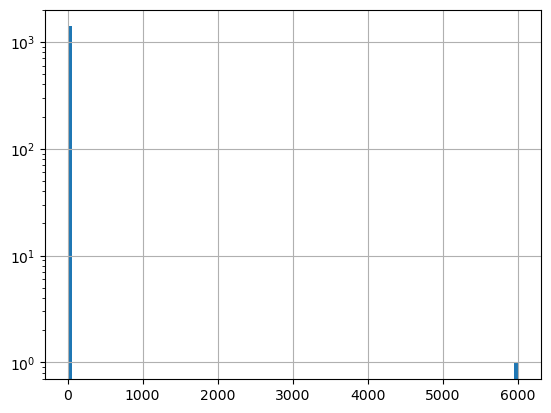

In [24]:
df["timestamp"].diff().hist(log=True, bins=100)


In [173]:
df[df["timestamp"].diff() > df["timestamp"].diff().median() * 1.5]["timestamp"].diff()

32        NaN
64      160.0
96      161.0
128     159.0
160     162.0
        ...  
2656    158.0
2688    165.0
2720    159.0
2752    161.0
2784    161.0
Name: timestamp, Length: 87, dtype: float64

Sampling rate: 224.22 Hz


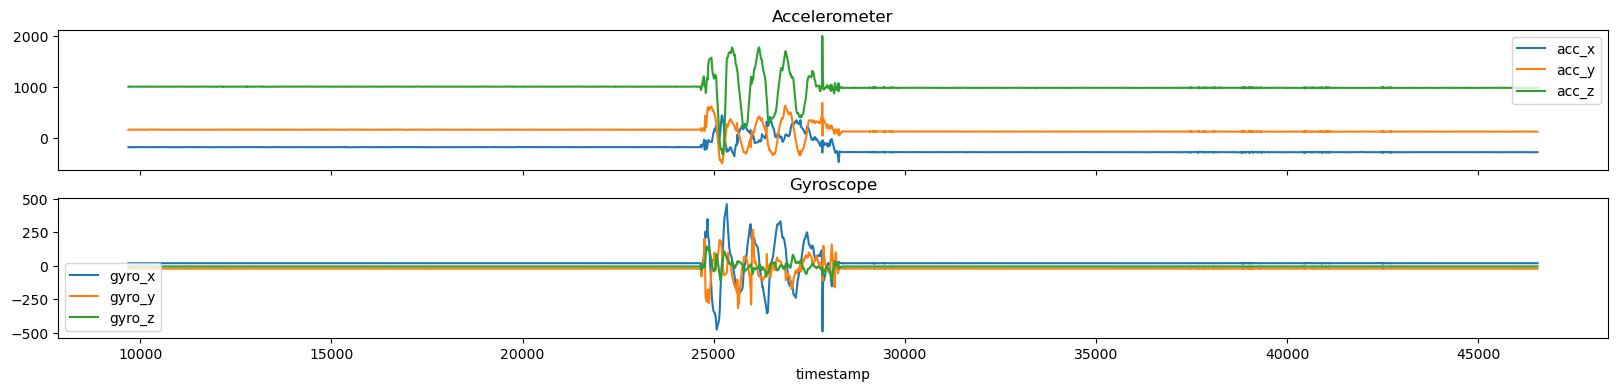

In [81]:
fig, axes = plt.subplots(2, 1, figsize=(20, 4), sharex=True)
df.plot(x='timestamp', y=['acc_x', 'acc_y', 'acc_z'], ax=axes[0])
axes[0].set_title('Accelerometer')
df.plot(x='timestamp', y=['gyro_x', 'gyro_y', 'gyro_z'], ax=axes[1])
axes[1].set_title('Gyroscope')

sampling_rate = 1000/df["timestamp"].diff().median()
print(f"Sampling rate: {sampling_rate:.2f} Hz")

C:\Users\lhauptmann\AppData\Local\Temp\ipykernel_51988\4195187119.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_ppg = pd.read_csv(os.path.join(data_path, ppg_file), skiprows=32, skipfooter=5)


Sampling rate: 111.62 Hz


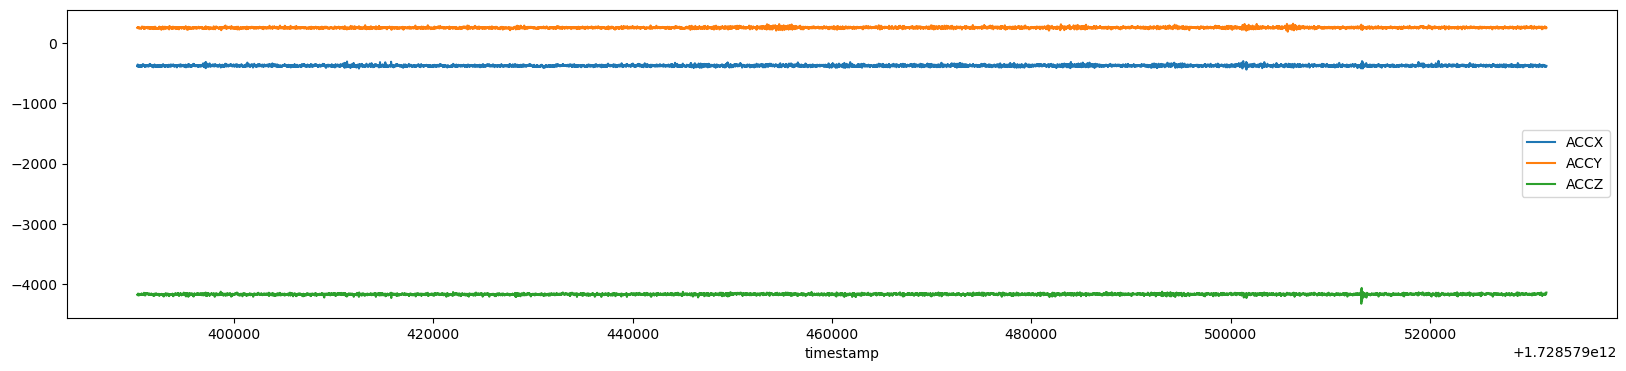

In [4]:
df_ppg = pd.read_csv(os.path.join(data_path, ppg_file), skiprows=32, skipfooter=5)
df_ppg.plot(x='timestamp', y=["ACCX", "ACCY", "ACCZ"], figsize=(20, 4))

sampling_rate = 1000/df_ppg["timestamp"].diff().median()
print(f"Sampling rate: {sampling_rate:.2f} Hz")

<Axes: >

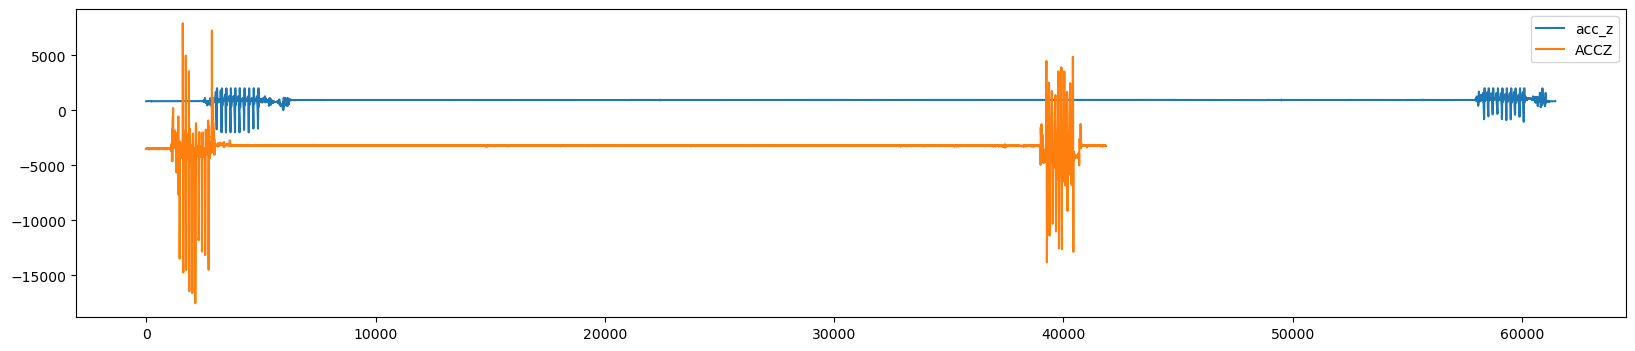

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
df.plot(y='acc_z', ax=ax)
df_ppg.plot(y='ACCZ', ax=ax)

Text(0.5, 1.0, 'IMU Accelerometer')

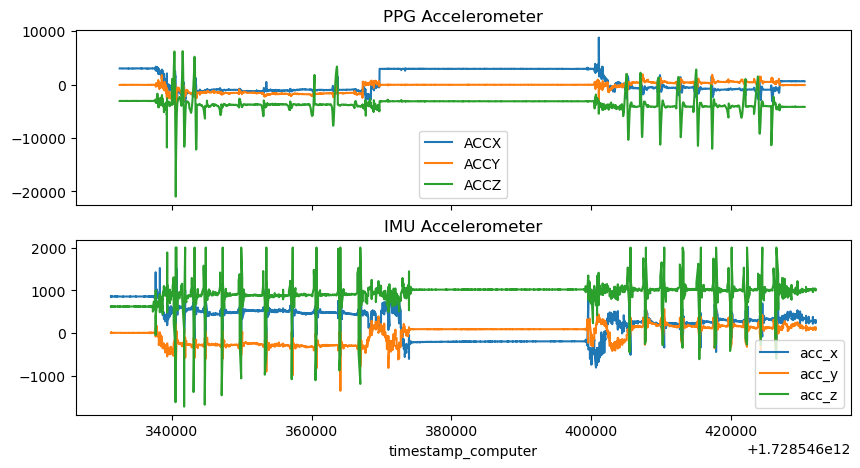

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True, sharey=False)

df_ppg.plot(x='timestamp', y=["ACCX", "ACCY", "ACCZ"], ax=axes[0])
axes[0].set_title('PPG Accelerometer')
df.plot(x="timestamp_computer", y=['acc_x', 'acc_y', 'acc_z'], ax=axes[1])
axes[1].set_title('IMU Accelerometer')

<Axes: xlabel='timestamp_computer'>

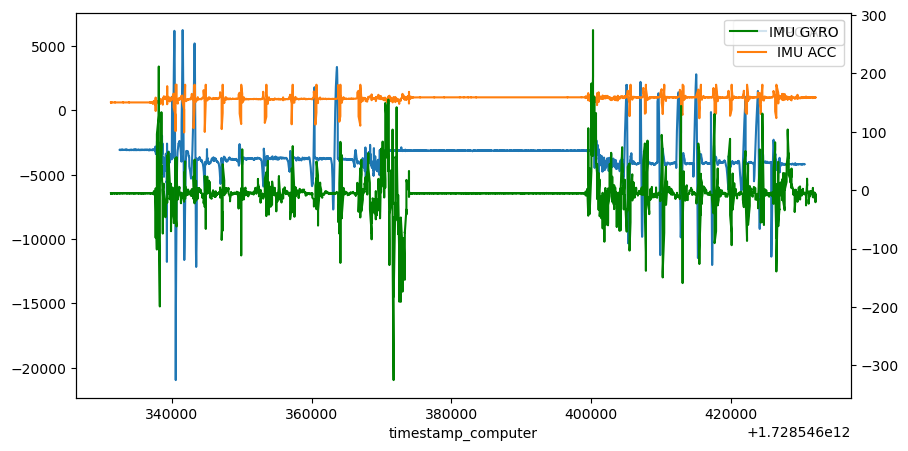

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df["timestamp_al"] = df["timestamp"] - df["timestamp"].min() + df["timestamp_computer"].min()
df_ppg.plot(x='timestamp', y="ACCZ", ax=ax, label="PPG ACC")
df.plot(x="timestamp_computer", y='acc_z', ax=ax, label="IMU ACC")
twinax = ax.twinx()
df.plot(x="timestamp_computer", y='gyro_z', ax=twinax, label="IMU GYRO", color="green")




In [58]:
df_ppg.columns

Index(['timestamp', 'sampleNum', 'tagMEAS1_PPG1', 'tagMEAS1_PPG2',
       'tagMEAS1_PPG3', 'tagMEAS1_PPG4', 'tagMEAS2_PPG1', 'tagMEAS2_PPG2',
       'tagMEAS2_PPG3', 'tagMEAS2_PPG4', 'tagMEAS3_PPG1', 'tagMEAS3_PPG2',
       'tagMEAS3_PPG3', 'tagMEAS3_PPG4', 'tagMEAS4_PPG1', 'tagMEAS4_PPG2',
       'tagMEAS4_PPG3', 'tagMEAS4_PPG4', 'tagMEAS5_PPG1', 'tagMEAS5_PPG2',
       'tagMEAS5_PPG3', 'tagMEAS5_PPG4', 'tagMEAS6_PPG1', 'tagMEAS6_PPG2',
       'tagMEAS6_PPG3', 'tagMEAS6_PPG4', 'tagMEAS7_PPG1', 'tagMEAS7_PPG2',
       'tagMEAS7_PPG3', 'tagMEAS7_PPG4', 'MEAS1_PPG1', 'MEAS1_PPG2',
       'MEAS1_PPG3', 'MEAS1_PPG4', 'MEAS2_PPG1', 'MEAS2_PPG2', 'MEAS2_PPG3',
       'MEAS2_PPG4', 'MEAS3_PPG1', 'MEAS3_PPG2', 'MEAS3_PPG3', 'MEAS3_PPG4',
       'MEAS4_PPG1', 'MEAS4_PPG2', 'MEAS4_PPG3', 'MEAS4_PPG4', 'MEAS5_PPG1',
       'MEAS5_PPG2', 'MEAS5_PPG3', 'MEAS5_PPG4', 'MEAS6_PPG1', 'MEAS6_PPG2',
       'MEAS6_PPG3', 'MEAS6_PPG4', 'MEAS7_PPG1', 'MEAS7_PPG2', 'MEAS7_PPG3',
       'MEAS7_PPG4', 'ACCX', 

In [86]:
data_file = os.path.join(data_path, "ppg_001.txt")

data = open(data_file, "r").read()

rows = data.strip().split("\n")

def pad_to_longest(package_dict):
    longest = max([len(v) for v in package_dict.values()])
    for k in package_dict.keys():
        package_dict[k] += [0] * (longest - len(package_dict[k]))
    return package_dict

def update_dict(data_dict, package_dict, package_id=None):
    
    if package_id is not None:
        package_dict["package_id"] = [package_id] * len(package_dict[0])
    
    for k in package_dict.keys():
        data_dict[k].extend(package_dict[k])
    return data_dict


data_dict = {k:[] for k in range(0,19)}
data_dict["package_id"] = []
package_dict = {k:[] for k in range(0,19)}
# Loop over each row
package_id = 0
previous_key = 100
for row in rows:
    # Split the row by spaces and convert each entry to an integer
    row_split = row.split(" ")
    key = int(row_split[0])  
    data_values = [float(el) for el in row_split[1:] if el != ""]
    if key < previous_key:
        package_dict = pad_to_longest(package_dict)
        data_dict = update_dict(data_dict, package_dict, package_id)
        package_dict = {k:[] for k in range(0,19)}
        package_id += 1
    package_dict[key].extend(data_values)
    previous_key = key
df_data = pd.DataFrame(data_dict)
df_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,package_id
0,51640.0,51122.0,30968.0,43482.0,226873.0,270611.0,218608.0,139288.0,226782.0,270492.0,218582.0,139304.0,99796.0,119321.0,96418.0,61494.0,7.892517,-0.581995,-6.337341,4
1,51594.0,51127.0,30948.0,43322.0,226918.0,270682.0,218294.0,139223.0,226957.0,270749.0,218263.0,139183.0,99935.0,119530.0,96269.0,61424.0,8.242432,-0.416907,-6.319995,4
2,51955.0,51286.0,30162.0,42677.0,229277.0,273870.0,218050.0,138874.0,229517.0,274175.0,218005.0,138824.0,101148.0,121137.0,96149.0,61255.0,8.478699,-0.531152,-6.166870,4
3,52960.0,51721.0,29071.0,41824.0,234841.0,280248.0,218056.0,138728.0,235220.0,280641.0,218040.0,138714.0,103715.0,124036.0,96182.0,61231.0,8.564233,-0.486890,-5.776880,4
4,54120.0,52171.0,28198.0,41144.0,240945.0,286881.0,218244.0,138755.0,241243.0,287206.0,218239.0,138757.0,106311.0,126864.0,96258.0,61257.0,8.607898,-0.245239,-5.436536,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772,14360.0,8664.0,5493.0,8739.0,75056.0,60671.0,35599.0,27133.0,75051.0,60681.0,35613.0,27144.0,32903.0,26667.0,15663.0,11948.0,-0.022131,1.536633,-9.712671,30
6773,14370.0,8684.0,5509.0,8757.0,75033.0,60674.0,35606.0,27146.0,75032.0,60669.0,35597.0,27132.0,32879.0,26648.0,15640.0,11918.0,0.013159,1.533643,-9.683960,30
6774,14368.0,8696.0,5517.0,8763.0,75046.0,60701.0,35624.0,27164.0,75044.0,60681.0,35607.0,27148.0,32891.0,26653.0,15654.0,11936.0,0.023926,1.492371,-9.717456,30
6775,14388.0,8661.0,5488.0,8735.0,75055.0,60674.0,35601.0,27140.0,75039.0,60665.0,35598.0,27135.0,32893.0,26658.0,15650.0,11931.0,0.061609,1.462463,-9.665417,30


In [92]:
df_data.loc[:,0:15].corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,0.957967,0.903407,0.951474,0.875556,0.876029,0.917288,0.914674,0.850524,0.853482,0.910362,0.912851,0.907237,0.907882,0.914698,0.904015
1,0.957967,1.000000,0.966147,0.977283,0.824717,0.828472,0.876364,0.875413,0.802404,0.807622,0.867213,0.868547,0.841588,0.850101,0.866773,0.856380
2,0.903407,0.966147,1.000000,0.972153,0.781116,0.787730,0.838945,0.840854,0.760459,0.767196,0.829403,0.833067,0.790880,0.803172,0.826707,0.820085
3,0.951474,0.977283,0.972153,1.000000,0.857739,0.860276,0.906160,0.907528,0.835449,0.837318,0.895140,0.898527,0.869763,0.876762,0.892821,0.886134
4,0.875556,0.824717,0.781116,0.857739,1.000000,0.991510,0.954402,0.949152,0.971099,0.964720,0.941518,0.938483,0.938152,0.946496,0.938878,0.925241
5,0.876029,0.828472,0.787730,0.860276,0.991510,1.000000,0.964093,0.958800,0.974131,0.971192,0.951532,0.948586,0.947470,0.955984,0.949056,0.935758
6,0.917288,0.876364,0.838945,0.906160,0.954402,0.964093,1.000000,0.996131,0.966642,0.967626,0.988245,0.987000,0.981913,0.984192,0.985984,0.974640
7,0.914674,0.875413,0.840854,0.907528,0.949152,0.958800,0.996131,1.000000,0.968189,0.968797,0.990065,0.990742,0.983306,0.985532,0.987825,0.978349
8,0.850524,0.802404,0.760459,0.835449,0.971099,0.974131,0.966642,0.968189,1.000000,0.990353,0.964377,0.959985,0.957589,0.967257,0.959844,0.944994
9,0.853482,0.807622,0.767196,0.837318,0.964720,0.971192,0.967626,0.968797,0.990353,1.000000,0.975802,0.971406,0.968601,0.978194,0.971414,0.956705
